# Lab 03: Adults 

### Author: Jack Stoetzel [jstoetzel1@gulls.salisbury.edu]

### Date: September 17, 2020

### Objectives:
1. Practice efficiently manipulating data with Python 
2. Use the matplotlib, pandas libraries
3. Gain familiarity with data import and plotting

### Description:


In [1]:
import pandas as pd

In [2]:
file = open("./adult.data", "r")

In [3]:
adults = pd.read_csv('./adult.data',
                      header=None,
                      skipinitialspace=True,
                      names=[
                             'age', 'workclass', 'fnlwgt', 'education',
                             'education-num', 'marital-status', 
                             'occupation', 'relationship', 'race',
                             'sex', 'capital-gain', 'capital-loss',
                             'hours-per-week', 'native-country', 'income'
                            ]
                     )

adults

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# Rank each occupation in terms of most likely to earn more than $50k.
occ_inc = adults[['occupation', 'income']]
occ_gt50 = occ_inc[occ_inc['income'] == '>50K'].groupby('occupation').count()
occ_le50 = occ_inc[occ_inc['income'] == '<=50K'].groupby('occupation').count()

percent_gt50 = occ_gt50 / (occ_gt50 + occ_le50)
percent_gt50.sort_values(by='income', ascending=False).round(2)

,income
occupation,
Exec-managerial,0.48
Prof-specialty,0.45
Protective-serv,0.33
Tech-support,0.30
Sales,0.27
Craft-repair,0.23
Transport-moving,0.20
Adm-clerical,0.13
Machine-op-inspct,0.12


In [5]:
# Calculate the median age of people who make more and less than $50k. Calculate the medians for each again, 
# but now split apart by the sex of the adults.

age_inc = adults[['age', 'income']]

median = age_inc[age_inc['income'] == '<=50K'].sort_values(by='age', ascending=True).median()['age']
print(f"The median age for adults who make $50,000 or less is {median}")

median = age_inc[age_inc['income'] == '>50K'].sort_values(by='age', ascending=True).median()['age']
print(f"The median age for adults who make over $50,000 is {median}")
print()

sex_age_inc = adults[['sex', 'age', 'income']]

female_age_inc = sex_age_inc[sex_age_inc['sex'] == 'Female']

median = female_age_inc[female_age_inc['income'] == '<=50K'].sort_values(by='age', ascending=True).median()['age']
print(f"The median age for female adults who make $50,000 or less is {median}")

median = female_age_inc[female_age_inc['income'] == '>50K'].sort_values(by='age', ascending=True).median()['age']
print(f"The median age for female adults who make over $50,000 is {median}")
print()

male_age_inc = sex_age_inc[sex_age_inc['sex'] == 'Male']

median = male_age_inc[male_age_inc['income'] == '<=50K'].sort_values(by='age', ascending=True).median()['age']
print(f"The median age for male adults who make $50,000 or less is {median}")

median = male_age_inc[male_age_inc['income'] == '>50K'].sort_values(by='age', ascending=True).median()['age']
print(f"The median age for male adults who make over $50,000 is {median}")

The median age for adults who make $50,000 or less is 34.0
The median age for adults who make over $50,000 is 44.0

The median age for female adults who make $50,000 or less is 34.0
The median age for female adults who make over $50,000 is 41.0

The median age for male adults who make $50,000 or less is 35.0
The median age for male adults who make over $50,000 is 44.0


In [6]:
# Calculate the mean and median number of years of education held by adults who make more and less than $50k.

edu_inc = adults[['education-num', 'income']]

median = edu_inc[edu_inc['income']=='<=50K'].sort_values('education-num', ascending=True).median()['education-num']
mean = edu_inc[edu_inc['income']=='<=50K'].sort_values('education-num', ascending=True).mean()['education-num']
print(f"The mean education for adults who make $50,000 or less is {mean:.2} years and the medain is {median} years.")
print()

median = edu_inc[edu_inc['income']=='>50K'].sort_values('education-num', ascending=True).median()['education-num']
mean = edu_inc[edu_inc['income']=='>50K'].sort_values('education-num', ascending=True).mean()['education-num']
print(f"The mean education for adults who make over $50,000 is {mean:.3} years and the medain is {median} years.")

The mean education for adults who make $50,000 or less is 9.6 years and the medain is 9.0 years.

The mean education for adults who make over $50,000 is 11.6 years and the medain is 12.0 years.


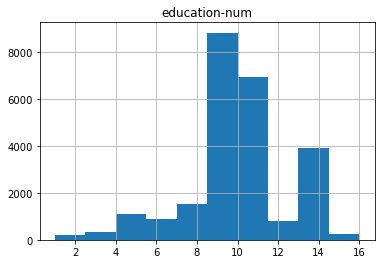

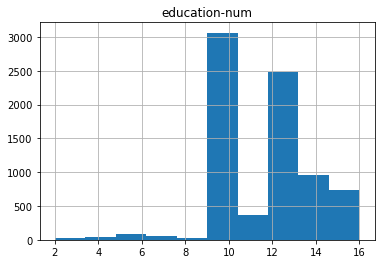

In [7]:
# Plot a histogram to see the distribution of years of school held by adults who make more and less than $50k.

edu_inc = adults[['education-num', 'income']]

edu_le50 = edu_inc[edu_inc['income']=='<=50K'].sort_values('education-num', ascending=True).hist()
edu_gt50 = edu_inc[edu_inc['income']=='>50K'].sort_values('education-num', ascending=True).hist()

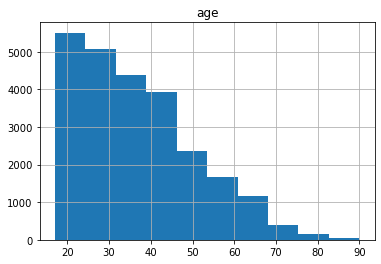

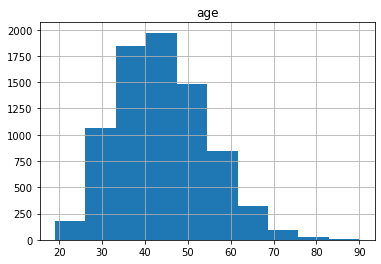

In [8]:
# Plot a histogram to see the distribution of ages of adults who make more and less than $50k.

age_inc = adults[['age', 'income']]

# print("Histogram of the number of adults at each age that make $50,000 or less.")
age_le50 = age_inc[age_inc['income'] == '<=50K'].sort_values(by='age', ascending=True).hist()

# print("Histogram of the number of adults at each age that make over $50,000.")
age_gt50 = age_inc[age_inc['income'] == '>50K'].sort_values(by='age', ascending=True).hist()

